# Importing Neccessary Libraries

In [1]:
import os
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import cv2

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D, Input, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,ResNet50
from tensorflow.keras.applications import vgg16,resnet50


# Importing Dataset

## One way

In [2]:
# # Creating Kaggle directory in the right location
# os.makedirs('/root/.kaggle', exist_ok=True)

# # Move the kaggle.json file to the correct location
# os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

# # Set permissions to protect your API credentials
# os.chmod('/root/.kaggle/kaggle.json', 600)

In [3]:
# !kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition


## Another way

In [4]:
#Setting the content directory as the  Kaggle Configuration directory
os.environ['KAGGLE_CONFIG_DIR'] = r'/content'

In [5]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition


Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
fruit-and-vegetable-image-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


## Extracting zipfile

In [6]:
#The data is in a zip format, so unzipping it
with zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip', mode ='r') as zip:
     zip.extractall('data')

#extraction yields 3 folders - train,test.val

# Creating train, test and validation data

As the data has been divided in multiple folders named with their class names, it cannot be loaded as 2 classes namely fruits and vegetables using imagedatagenerator. So Necessary preprocessing steps are done to split the data into labels 0 and 1 indicating fruits and vegetables.

In [7]:
class_names = {
    'fruits' : ['banana',
                'apple',
                'pear',
                'grapes',
                'orange',
                'kiwi',
                'watermelon',
                'pomegranate',
                'pineapple',
                'mango'],

    'vegetables' : ['cucumber',
                    'carrot',
                    'capsicum',
                    'onion',
                    'potato',
                    'lemon',
                    'tomato',
                    'raddish',
                    'beetroot',
                    'cabbage',
                    'lettuce',
                    'spinach',
                    'soy beans',
                    'cauliflower',
                    'bell pepper',
                    'turnip',
                    'corn',
                    'sweetcorn',
                    'sweetpotato',
                    'paprika',
                    'jalepeno',
                    'ginger',
                    'garlic',
                    'peas',
                    'eggplant']

}

## Training Data

In [8]:
x_train = []
y_train = []
for fruit in class_names['fruits']:
  folderpath = f'/content/data/train/{fruit}'
  images = [image for image in os.listdir(folderpath)]


  for image in images:
    filepath = f'/content/data/train/{fruit}/{image}'

    new_image = cv2.imread(filepath)
    resized_image = cv2.resize(new_image, (224,224))  #resized image is already in array format
    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB )   #Converting to RGB Format
    x_train.append(image_rgb)

    y_train.append(np.array([0])) #class 0 for fruits


In [9]:
for veg in class_names['vegetables']:
  folderpath = f'/content/data/train/{veg}'
  images = [image for image in os.listdir(folderpath)]


  for image in images:
    filepath = f'/content/data/train/{veg}/{image}'

    new_image = cv2.imread(filepath)
    if image == 'Image_56.jpg' and veg == 'bell pepper':   #This specific image is throwing an error
      continue

    resized_image = cv2.resize(new_image, (224,224))  #resized image is already in arry format
    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB )     #Converting to RGB Format
    x_train.append(image_rgb)

    y_train.append(np.array([1])) #class 1 for vegetables

In [10]:
# error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

In [11]:
#converting the list to an array
x_train = np.array(x_train)
y_train = np.array(y_train)

In [12]:
x_train.shape, y_train.shape   #Checking shapes to conform the data and labels are matching

((3027, 224, 224, 3), (3027, 1))

## Test Data

In [13]:
x_test = []
y_test = []
for fruit in class_names['fruits']:
  folderpath = f'/content/data/test/{fruit}'
  images = [image for image in os.listdir(folderpath)]


  for image in images:
    filepath = f'/content/data/test/{fruit}/{image}'

    new_image = cv2.imread(filepath)
    resized_image = cv2.resize(new_image, (224,224))  #resized image is already in arry format
    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB )   #Converting to RGB Format
    x_test.append(image_rgb)

    y_test.append(np.array([0])) #class 0 for fruits


In [14]:
for veg in class_names['vegetables']:
  folderpath = f'/content/data/test/{veg}'
  images = [image for image in os.listdir(folderpath)]


  for image in images:
    filepath = f'/content/data/test/{veg}/{image}'

    new_image = cv2.imread(filepath)
    resized_image = cv2.resize(new_image, (224,224))  #resized image is already in arry format
    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB )     #Converting to RGB Format
    x_test.append(image_rgb)

    y_test.append(np.array([1])) #class 1 for vegetables

In [15]:
#converting the list to an array
x_test = np.array(x_test)
y_test = np.array(y_test)

In [16]:
x_test.shape, y_test.shape #Checking shapes to conform the data and labels are matching

((349, 224, 224, 3), (349, 1))

## Validation set

In [17]:
x_val = []
y_val = []
for fruit in class_names['fruits']:
  folderpath = f'/content/data/validation/{fruit}'
  images = [image for image in os.listdir(folderpath)]


  for image in images:
    filepath = f'/content/data/validation/{fruit}/{image}'

    new_image = cv2.imread(filepath)
    resized_image = cv2.resize(new_image, (224,224))  #resized image is already in arry format
    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB )   #Converting to RGB Format
    x_val.append(image_rgb)

    y_val.append(np.array([0])) #class 0 for fruits


In [18]:
for veg in class_names['vegetables']:
  folderpath = f'/content/data/validation/{veg}'
  images = [image for image in os.listdir(folderpath)]


  for image in images:
    filepath = f'/content/data/validation/{veg}/{image}'

    new_image = cv2.imread(filepath)
    resized_image = cv2.resize(new_image, (224,224))  #resized image is already in arry format
    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB )     #Converting to RGB Format
    x_val.append(image_rgb)

    y_val.append(np.array([1])) #class 1 for vegetables

In [19]:
#converting the list to an array
x_val = np.array(x_val)
y_val = np.array(y_val)

In [20]:
x_val.shape, y_val.shape  #Checking shapes to confirm the data and labels are matching

((342, 224, 224, 3), (342, 1))

we are creating 2 sets of resized data
 + one for the pre trained models(224,224,3)
 + other for our own models(32,32,3)

In [21]:
x_train_32 = []
x_test_32 = []
x_val_32 = []

for img in x_train:
  new_img = cv2.resize(img,(32,32))
  x_train_32.append(new_img)

for img in x_test:
  new_img = cv2.resize(img,(32,32))
  x_test_32.append(new_img)

for img in x_val:
  new_img = cv2.resize(img,(32,32))
  x_val_32.append(new_img)

In [22]:
x_train_32 = np.array(x_train_32)
x_test_32 = np.array(x_test_32)
x_val_32 = np.array(x_val_32)

### Normalizing

In [23]:
x_train = (x_train/255.0).astype('float32')
x_test = (x_test/255.0).astype('float32')
x_val = (x_val/255.0).astype('float32')

x_train_32 = (x_train_32/255.0).astype('float32')
x_test_32 = (x_test_32/255.0).astype('float32')
x_val_32 = (x_val_32/255.0).astype('float32')

# Checking Images in the input dataset

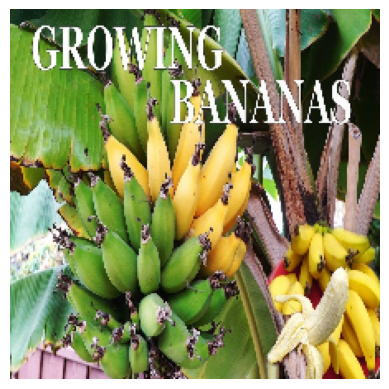

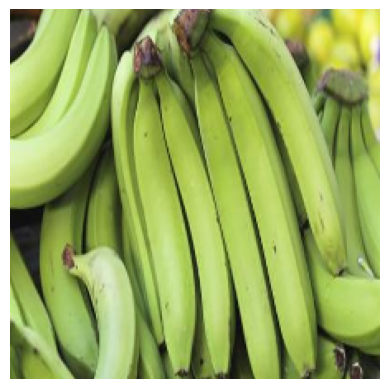

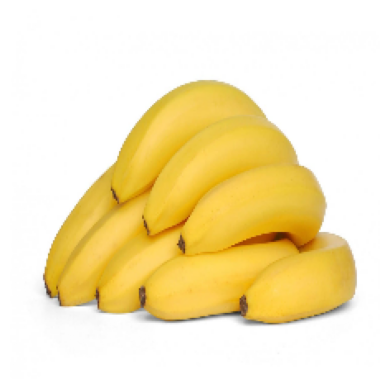

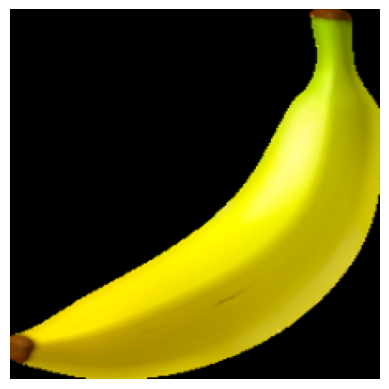

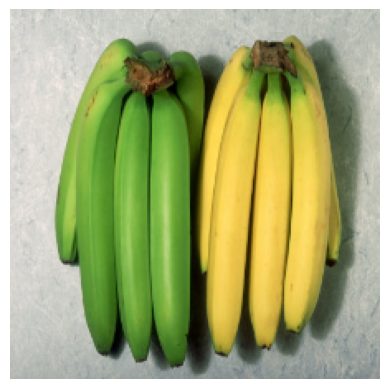

In [24]:
#checking images in (224*224*3) format
for i in range(5):
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.show()

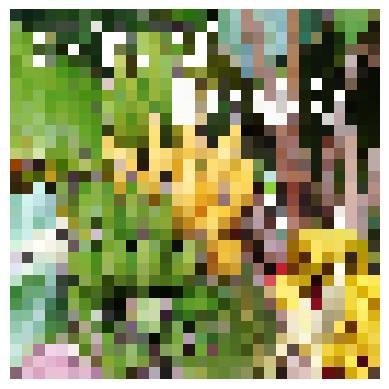

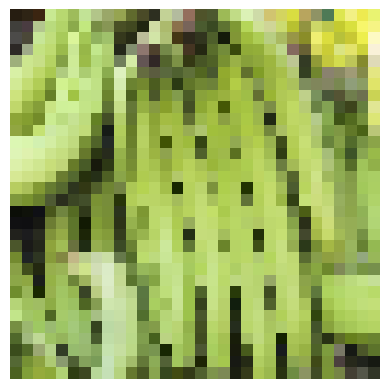

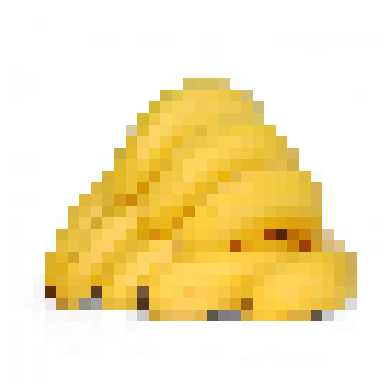

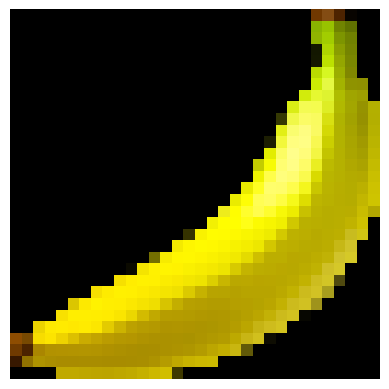

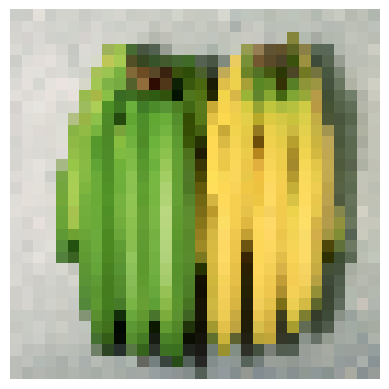

In [25]:
#checking images in (32*32*3) format
for i in range(5):
  plt.imshow(x_train_32[i])
  plt.axis('off')
  plt.show()

# CNN Model

In [26]:
model = Sequential()

#Input layer
model.add(Input(shape=(32,32,3)))

#First Block
model.add(Conv2D(filters= 64,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))
model.add(Conv2D(filters= 64,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))

model.add(MaxPooling2D(pool_size=(4,4)))

#SecondBlock
model.add(Conv2D(256,(3,3), activation = 'relu',strides =(2,2)))
model.add(Conv2D(256,(3,3), activation = 'relu',padding ='same'))
model.add(MaxPooling2D(pool_size=(3,3)))



#FNN
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


In [27]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [28]:
history = model.fit(x_train_32,y_train,
                    epochs = 30,
                    validation_data=(x_val_32,y_val))

Epoch 1/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6997 - loss: 0.6090 - val_accuracy: 0.7164 - val_loss: 0.5951
Epoch 2/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7402 - loss: 0.5573 - val_accuracy: 0.7164 - val_loss: 0.5634
Epoch 3/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7277 - loss: 0.5650 - val_accuracy: 0.7398 - val_loss: 0.5240
Epoch 4/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7338 - loss: 0.5221 - val_accuracy: 0.7807 - val_loss: 0.4145
Epoch 5/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7704 - loss: 0.4903 - val_accuracy: 0.8275 - val_loss: 0.3911
Epoch 6/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7721 - loss: 0.4774 - val_accuracy: 0.8596 - val_loss: 0.3542
Epoch 7/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8050 - loss: 0.4112 - val_accuracy: 0.8509 - val_loss: 0.3143
Epoch 8/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8309 - loss: 0.3664 - val_accuracy: 0.9181 - val_loss

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 256)           │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,527,685 (9.64 MB)

 Trainable params: 842,561 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,685,124 (6.43 MB)

## Plotting train and validation loss

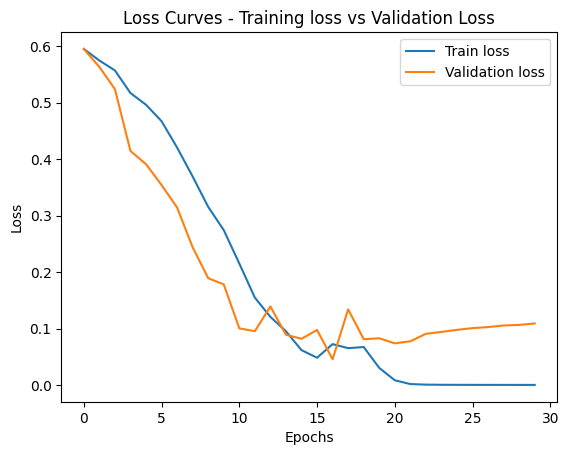

In [30]:
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title('Loss Curves - Training loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting Train and Validation Accuracy

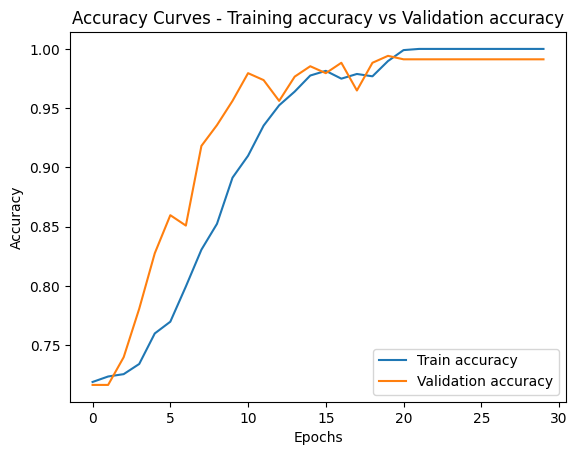

In [31]:
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.title('Accuracy Curves - Training accuracy vs Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Evaluating Test Data

In [32]:
test_loss,test_acc = model.evaluate(x_test_32,y_test, verbose = 2)

11/11 - 1s - 51ms/step - accuracy: 0.9914 - loss: 0.1068


In [33]:
print(f'Test Accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')

Test Accuracy: 0.9914039969444275
Test Loss: 0.10683862864971161


# Pre Trained VGG 16 architechture

In [34]:
# Input Preprocessing for vgg16 architechture
vgg_input = vgg16.preprocess_input(x_train)
vgg_val = vgg16.preprocess_input(x_val)
vgg_test = vgg16.preprocess_input(x_test)

In [35]:
vgg = VGG16(
    weights = 'imagenet',
    input_shape = (224,224,3),
    include_top = False
)

#Freezing the model
vgg.trainable = False

#Adding custom layers
model1 = Sequential([
    vgg,
    Flatten(),
    Dense(1024, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')

])



#Compile model
model1.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [36]:
history1 = model1.fit(vgg_input,y_train,
           epochs = 25,
           validation_data = (vgg_val,y_val))

Epoch 1/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 48s 355ms/step - accuracy: 0.6448 - loss: 1.6658 - val_accuracy: 0.7164 - val_loss: 0.6157
Epoch 2/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 48s 133ms/step - accuracy: 0.6812 - loss: 0.6532 - val_accuracy: 0.7251 - val_loss: 0.5716
Epoch 3/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 20s 134ms/step - accuracy: 0.7081 - loss: 0.6105 - val_accuracy: 0.7193 - val_loss: 0.5930
Epoch 4/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.7024 - loss: 0.6176 - val_accuracy: 0.7164 - val_loss: 0.5873
Epoch 5/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.7264 - loss: 0.5906 - val_accuracy: 0.7164 - val_loss: 0.6395
Epoch 6/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - accuracy: 0.6830 - loss: 0.6201 - val_accuracy: 0.7251 - val_loss: 0.5792
Epoch 7/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - accuracy: 0.7159 - loss: 0.5993 - val_accuracy: 0.7251 - val_loss: 0.5808
Epoch 8/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.7413 - loss: 0.5716 - val_accu

In [37]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │      25,691,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,985,093 (350.90 MB)

 Trainable params: 25,756,801 (98.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 51,513,604 (196.51 MB)

## Plotting Train and Validation Accuracy

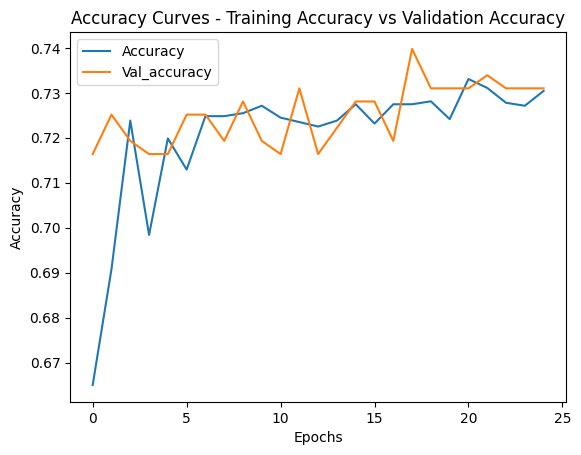

In [38]:
plt.plot(history1.history['accuracy'], label = 'Accuracy')
plt.plot(history1.history['val_accuracy'], label = 'Val_accuracy')
plt.title('Accuracy Curves - Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Plotting Train and Validation Loss

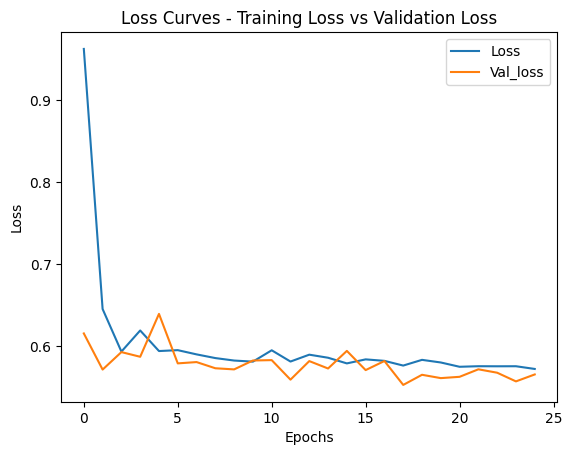

In [39]:
plt.plot(history1.history['loss'], label = 'Loss')
plt.plot(history1.history['val_loss'], label = 'Val_loss')
plt.title('Loss Curves - Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluating test data

In [40]:
loss,acc = model1.evaluate(vgg_test,y_test, verbose = 2)

print(f'Test Accuracy: {acc}')
print(f'Test Loss: {loss}')

11/11 - 14s - 1s/step - accuracy: 0.7307 - loss: 0.5661
Test Accuracy: 0.730659008026123
Test Loss: 0.5661107897758484


Clearly the vgg16 is not giving optimum results and also the model is not training properly, may be because of insufficient data or the may be because the model is too deep for a simple binary classification or because of any other reason.

# Building another model from scratch using functional api

In [41]:
#Creating model using the functional API

#input layer - using the lower dimension images
input = Input(shape = (32,32,3))

#First Block
conv = Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu', padding = 'valid')(input)
conv = Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding ='valid')(conv)


#Second Block
conv = Conv2D(filters = 128,kernel_size = (2,2),activation = 'relu', padding = 'same',strides = (1,1))(conv)
conv = Conv2D(filters = 128,kernel_size = (2,2),activation = 'relu', padding = 'same',strides = (1,1))(conv)
conv = Conv2D(filters = 128,kernel_size = (2,2),activation = 'relu', padding = 'same',strides = (1,1))(conv)
pool = MaxPooling2D((2,2), padding = 'same')(conv)


#Last Block
flat = Flatten()(pool)
dense = Dense(64,activation = 'tanh')(flat)
dense = Dense(256,activation = 'tanh')(dense)

#output layer
output = Dense(1,activation = 'sigmoid')(dense)

model2 = Model(inputs = input, outputs = output)


#Compile
model2.compile(optimizer = 'adam',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])


In [42]:
history2 = model2.fit(x_train_32,y_train,
           epochs = 30,
           validation_data = (x_val_32,y_val))

Epoch 1/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.7189 - loss: 0.6404 - val_accuracy: 0.7164 - val_loss: 0.5893
Epoch 2/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7039 - loss: 0.6052 - val_accuracy: 0.7164 - val_loss: 0.5926
Epoch 3/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7230 - loss: 0.5858 - val_accuracy: 0.7456 - val_loss: 0.5344
Epoch 4/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7169 - loss: 0.5676 - val_accuracy: 0.7398 - val_loss: 0.5501
Epoch 5/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7282 - loss: 0.5559 - val_accuracy: 0.6842 - val_loss: 0.5357
Epoch 6/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7189 - loss: 0.5529 - val_accuracy: 0.7310 - val_loss: 0.4981
Epoch 7/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7224 - loss: 0.5606 - val_accuracy: 0.7251 - val_loss: 0.5120
Epoch 8/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7256 - loss: 0.5295 - val_accuracy: 0.8041 - v

## Plotting Train and Validation Accuracy

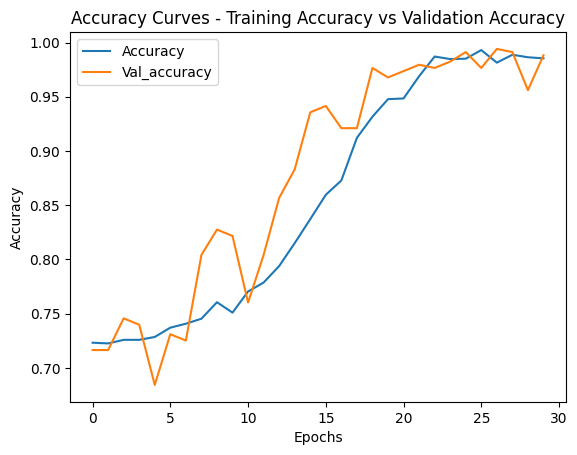

In [43]:
plt.plot(history2.history['accuracy'], label = 'Accuracy')
plt.plot(history2.history['val_accuracy'], label = 'Val_accuracy')
plt.title('Accuracy Curves - Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Plotting Train and Validation Loss

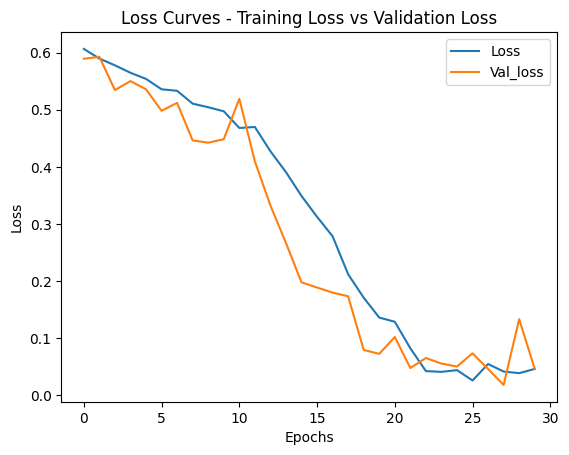

In [44]:
plt.plot(history2.history['loss'], label = 'Loss')
plt.plot(history2.history['val_loss'], label = 'Val_loss')
plt.title('Loss Curves - Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluating test data

In [45]:
loss,acc = model2.evaluate(x_test_32,y_test, verbose = 2)

print(f'Test Accuracy: {acc}')
print(f'Test Loss: {loss}')

11/11 - 1s - 62ms/step - accuracy: 0.9885 - loss: 0.0453
Test Accuracy: 0.9885386824607849
Test Loss: 0.04525003582239151


Trying Data Augmentation on the same model

In [46]:
image_generator = ImageDataGenerator(
    rotation_range = 30,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
    vertical_flip = True,
    width_shift_range = 0.3,
    height_shift_range = 0.3,

)



In [47]:
model2.fit(image_generator.flow(x_train_32,y_train,
                                batch_size = 32,),
           epochs = 25,
           validation_data = (x_val_32,y_val),
           )

Epoch 1/25
 1/95 ━━━━━━━━━━━━━━━━━━━━ 16s 175ms/step - accuracy: 0.7368 - loss: 1.4845

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6701 - loss: 0.9791 - val_accuracy: 0.7690 - val_loss: 0.5191
Epoch 2/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7423 - loss: 0.5366 - val_accuracy: 0.7222 - val_loss: 0.4922
Epoch 3/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7299 - loss: 0.5185 - val_accuracy: 0.8333 - val_loss: 0.3992
Epoch 4/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.7264 - loss: 0.5055 - val_accuracy: 0.8041 - val_loss: 0.4335
Epoch 5/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7355 - loss: 0.4984 - val_accuracy: 0.7368 - val_loss: 0.4241
Epoch 6/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7358 - loss: 0.4972 - val_accuracy: 0.7339 - val_loss: 0.4202
Epoch 7/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7473 - loss: 0.4983 - val_accuracy: 0.8596 - val_loss: 0.3667
Epoch 8/25
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.7619 - loss: 0.4692 - val_accuracy: 0.7982 - val_loss: 0.

# Resnet50

Trying resnet50 on the data

In [48]:
resnet_input = resnet50.preprocess_input(x_train)
resnet_test = resnet50.preprocess_input(x_test)
resnet_val = resnet50.preprocess_input(x_val)

resnet_input.shape

(3027, 224, 224, 3)

In [49]:
resnet = ResNet50(
    include_top = False,
    weights = 'imagenet',
    input_shape = (224,224,3)
)

#Freezing the earlier layers
resnet.trainable = False

In [50]:
model3 = Sequential([
    resnet,
    Flatten(),
    Dense(64,activation = 'relu'),
    Dense(64,activation = 'relu'),
    Dense(64,activation = 'relu'),
    Dense(1,activation = 'sigmoid')

])

In [51]:
model3.compile(optimizer = 'adam',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

In [52]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │       6,422,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,018,689 (114.51 MB)

 Trainable params: 6,430,977 (24.53 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [53]:
history3 = model3.fit(resnet_input,y_train,
                      epochs = 20,
                      validation_data = (resnet_val,y_val))

Epoch 1/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 34s 223ms/step - accuracy: 0.6146 - loss: 0.9826 - val_accuracy: 0.7164 - val_loss: 0.5936
Epoch 2/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.7388 - loss: 0.5936 - val_accuracy: 0.7164 - val_loss: 0.6162
Epoch 3/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.7389 - loss: 0.5800 - val_accuracy: 0.7164 - val_loss: 0.5976
Epoch 4/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.7182 - loss: 0.6146 - val_accuracy: 0.7164 - val_loss: 0.6381
Epoch 5/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.7179 - loss: 0.6162 - val_accuracy: 0.7164 - val_loss: 0.6083
Epoch 6/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.7301 - loss: 0.5956 - val_accuracy: 0.7164 - val_loss: 0.6090
Epoch 7/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.7434 - loss: 0.5856 - val_accuracy: 0.7164 - val_loss: 0.6246
Epoch 8/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.7305 - loss: 0.5966 - val_accurac

## Plotting Train and Validation Accuracy

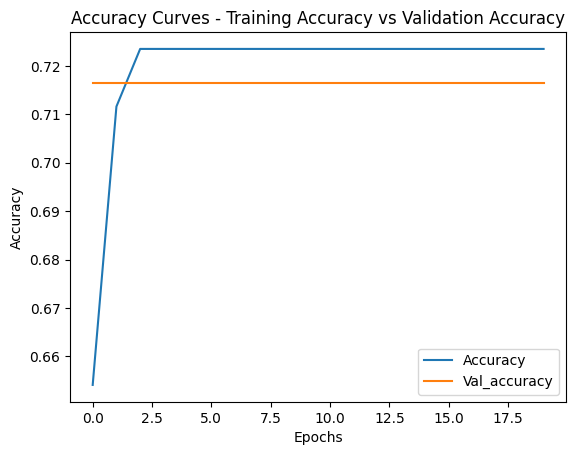

In [54]:
plt.plot(history3.history['accuracy'], label = 'Accuracy')
plt.plot(history3.history['val_accuracy'], label = 'Val_accuracy')
plt.title('Accuracy Curves - Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Plotting Train and Validation Loss

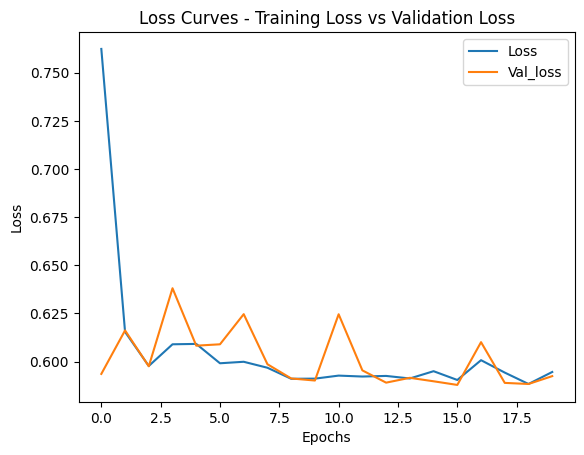

In [55]:
plt.plot(history3.history['loss'], label = 'Loss')
plt.plot(history3.history['val_loss'], label = 'Val_loss')
plt.title('Loss Curves - Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluating test data

In [56]:
loss,acc = model3.evaluate(resnet_test,y_test, verbose = 2)

print(f'Test Accuracy: {acc}')
print(f'Test Loss: {loss}')

11/11 - 5s - 432ms/step - accuracy: 0.7163 - loss: 0.5926
Test Accuracy: 0.7163323760032654
Test Loss: 0.5926119089126587


Not an optimum result